Title: 10.2 Exercises

Author: Chad Wood

Date: 16 Feb 2022

Modified By: Chad Wood

Description: This program demonstrates the use of python to summarize, plot, and describe data.

In [1]:
import pandas as pd

In [2]:
survey_data = pd.read_csv(r'week10data/survey_data.csv')
stats = pd.read_csv(r'week10data/qb_stats.csv')

### 1. Summarizing Data
In this exercise, you will be working with the file qb stats.csv. This file contains stats on NFL quarterbacks in the 2019 season. The data was obtained from
https://www.footballdb.com/statistics/nfl/player-stats/passing/2019/regular-season.

Use Python code to answer the following questions.

    (a) Find the mean of each numerical column of data.
    (b) Find the standard deviation of each numerical column of data.
    (c) Create a histogram of the number of yards; label it appropriately.
    (d) Create a boxplot of the number of touchdowns. Identify any outliers.

                 Mean         STD
games       14.125000    2.406309
att        478.406250  110.360366
cmp        306.562500   68.929575
comp_pct    64.296875    3.627537
yds       3515.062500  852.437489
ypa          7.375000    0.796768
td          22.375000    6.256609
int         10.343750    5.839849
sack        32.312500   10.514008
loss       217.093750   70.786075
rating      93.387500   11.054725


,name,team,games,att,cmp,comp_pct,yds,ypa,td,int,sack,loss,rating
24,Joe Flacco,DEN,8.0,262.0,171.0,65.3,1822.0,7.0,6.0,5.0,26.0,194.0,85.1


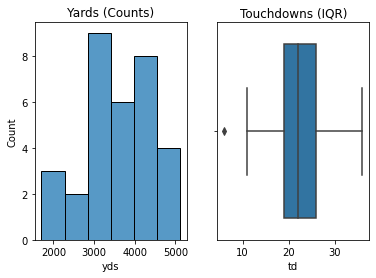

In [90]:
# (a) & (b)

# Data check reveals numeric cols all use float64
nums = stats.select_dtypes(include=['float64'])

# Returns mean and std
print(pd.concat([nums.mean(), nums.std()], axis=1, keys=['Mean', 'STD']))

# (c) & (d)

import matplotlib.pyplot as plt
import seaborn as sns

# Creates 2 subplots
f, axes = plt.subplots(1, 2)

# Seaborn autolabels; plots yards and touchdowns
sns.histplot(stats, x=stats.yds, ax=axes[0]).set_title('Yards (Counts)')
sns.boxplot(x=stats.td, ax=axes[1]).set_title('Touchdowns (IQR)')

# Identifies touchdown outlier (labeled with diamond)
stats.loc[stats['td'] < 10]

### 2. Calculating Probabilities from Data
In this exercise, you will be working with the file survey data.csv. This data has a list of college
students who were asked their hair color and eye color.
Use Python code to answer the following questions.


    (a) Based off of this data, what is the probability a college student has brown hair?
    (b) Based off of this data, what is the probability a college student has blue eyes?
    (c) Based off of this data, what is the probability a college student has blue eyes given that they have brown hair?
    (d) Based off of this data, what is the probability a college student has brown hair given that they have blue eyes?
    (e) Do your results above indicate that college students having brown hair and blue eyes are independent of one another? Explain.
    (f) Create a bar graph of the hair color and eye color of this group of students. Label the graphs appropriately.


Probability a college student has brown hair?
    0.5123456790123457

Probability a college student has blue eyes?
    0.24691358024691357

Probability a college student has blue eyes given that they have brown hair?
    0.21686746987951808

Probability a college student has brown hair given that they have blue eyes?
    0.45

Based on these data, theres no reason to believe brown hair color may have a significant impact on blue eye color, or vis versa. This is because the probabilities are a near match to background levels.


<AxesSubplot:xlabel='hair_color'>

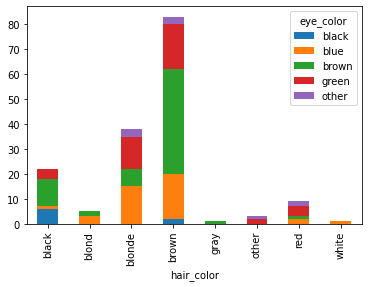

In [189]:
# (a); P(brown hair)
# length of df rows where hair==brown / total
brown_hairs = survey_data.loc[survey_data['hair_color']=='brown']
a = len(brown_hairs) / len(survey_data)

# (b); P(blue eyes)
# length of df rows where eye==blue / total
blue_eyes = survey_data.loc[survey_data['eye_color']=='blue']
b = len(blue_eyes) / len(survey_data)

# (c); P(blue eyes | brown hair)
# Length of blue eyes from brown hair df / total brown hair
c = len(brown_hairs.loc[brown_hairs['eye_color']=='blue']) / len(brown_hairs)

# (d); P(brown hair | blue eyes)
# Length of brown hair from blue eyes df / total blue eyes
d = len(blue_eyes.loc[blue_eyes['hair_color']=='brown']) / len(blue_eyes)

print(f'''
Probability a college student has brown hair?\n    {a}\n
Probability a college student has blue eyes?\n    {b}\n
Probability a college student has blue eyes given that they have brown hair?\n    {c}\n
Probability a college student has brown hair given that they have blue eyes?\n    {d}
''')

# (e)
print('Based on these data, theres no reason to believe brown hair color '
      'may have a significant impact on blue eye color, or vis versa. '
      'This is because the probabilities are a near match to background levels.')

# (f)
# Groups data and adds column for size of groups
survey_counts = survey_data.groupby(['hair_color', 'eye_color'], as_index=False
                                   ).size()

# Pivots frame tp plotable format. Labels are automattic
survey_counts.pivot(index='hair_color',
                    columns='eye_color', 
                    values='size').plot.bar(stacked=True)